## Matting
Using %%timeit obtained 419 ms ± 11.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

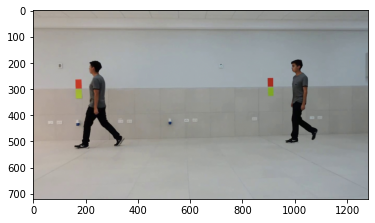

In [3]:

# Read the images
fg = cv2.imread("/home/josmar/proyectos/codes/datasets/ucb_gait_frames/images/027-002.jpg")
bg = cv2.imread("/home/josmar/proyectos/codes/datasets/ucb_gait_frames/images/027-094.jpg")
a = cv2.imread("/home/josmar/proyectos/codes/datasets/ucb_gait_frames/mattes/027-002.png")

# Convert uint8 to float
foreground = fg.astype(float)
background = bg.astype(float)

# Normalize the alpha mask to keep intensity between 0 and 1
alpha = a.astype(float)/255

# Multiply the foreground with the alpha matte
foreground = cv2.multiply(alpha, foreground)

# Multiply the background with ( 1 - alpha )
background = cv2.multiply(1.0 - alpha, background)

# Add the masked foreground and background.
outImage = cv2.add(foreground, background)

cv2.imwrite("new_new_out.jpg",outImage)
# Display image
plt.imshow((outImage/255)[:,:,::-1])


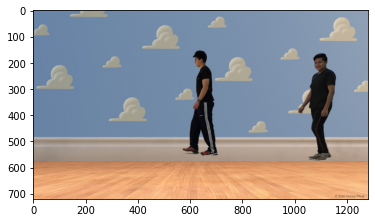

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


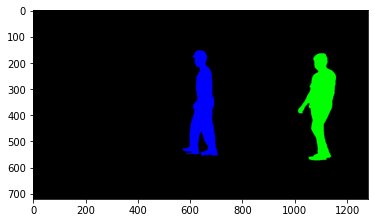

In [2]:

img_list = [
    {"image":"/home/josmar/proyectos/codes/datasets/ucb_gait_frames/images/018-060.jpg",
    "matte": "/home/josmar/proyectos/codes/datasets/ucb_gait_frames/mattes/018-060.png",
    "silhouette":"/home/josmar/proyectos/codes/datasets/ucb_gait_frames/silhouettes/018-060.png"},
    {"image":"/home/josmar/proyectos/codes/datasets/ucb_gait_frames/images/002-008.jpg",
    "matte": "/home/josmar/proyectos/codes/datasets/ucb_gait_frames/mattes/002-008.png",
    "silhouette":"/home/josmar/proyectos/codes/datasets/ucb_gait_frames/silhouettes/002-008.png"}
]
bg_path = "/media/josmar/Nuevo vol/Experiments/segmentation_codes/background.jpg"
colors = [(255,0,0),(0,255,0),(0,0,255)]
img_dest = "mix_img.jpg"
sil_dest = "mix_silhouettes.png"
def mix_images(img_list, bg_path, colors, img_dest, sil_dest, show=False):
    bg = cv2.imread(bg_path)
    silhouettes = np.zeros(bg.shape, np.float64) 
    index = 0
    for paths in img_list:
        # Reading image, matte, and silhouette for each image
        img = cv2.imread(paths["image"]).astype(float)
        matte = cv2.imread(paths["matte"]).astype(float)/255
        sil = cv2.imread(paths["silhouette"]).astype(float)/255

        # Mix silhouettes, all silhouettes will be saved in the silhouettes variable
        silhouettes = cv2.multiply(1.0-sil,silhouettes)
        silhouettes = cv2.add(sil*colors[index], silhouettes)
        
        # Mix images and save them in the bg variable
        bg = bg.astype(float)
        fg = cv2.multiply(img,matte)
        
        # Multiply the background with ( 1 - alpha )
        back = cv2.multiply(1.0 - matte, bg)

        # Add the masked foreground and background.
        bg = cv2.add(fg, back)

        index+=1

    # Show results
    if(show):
        plt.imshow((bg/255)[:,:,::-1])
        plt.show()
        plt.imshow(silhouettes[:,:,::-1])
        plt.show()
    # Save images
    cv2.imwrite(img_dest,bg)
    cv2.imwrite(sil_dest,silhouettes)
    
mix_images(img_list, bg_path, colors, img_dest, sil_dest, show=True)

In [20]:
sub_a = silhouettes
np.unique(sub_a.reshape(-1, sub_a.shape[2]), axis=0).shape

(4, 3)